# <p style="font-family:Cascadia Mono SemiBold;font-size:150%;text-align:center;color:#ff4d4d;"> Project:-MNIST Digits using Keras for Beginners</p>

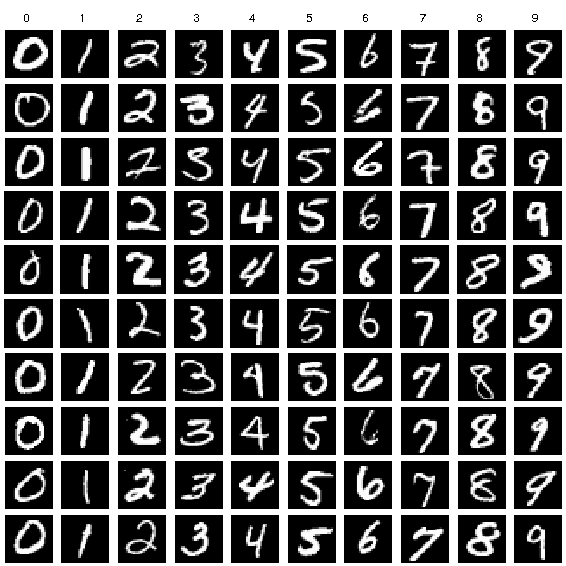
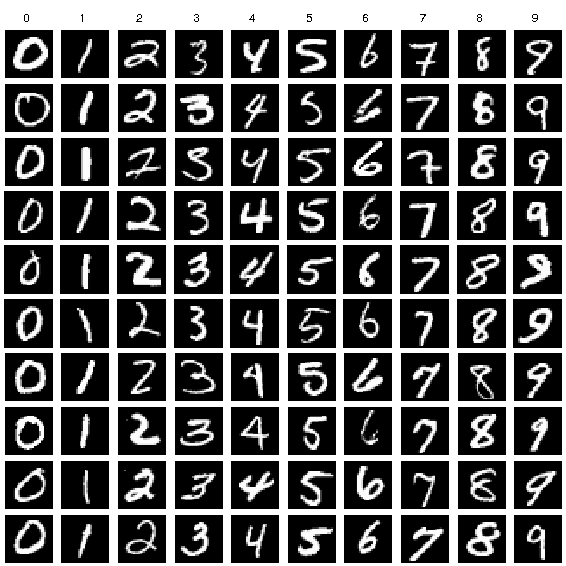

# <p style="font-family:Cascadia Mono SemiBold;font-size:150%;text-align:center;color:#ff4d4d;">Loading Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import os
import keras  
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k

2024-05-28 12:02:27.780031: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 12:02:27.780184: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 12:02:27.975876: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# <p style="font-family:Cascadia Mono SemiBold;font-size:150%;text-align:center;color:#ff4d4d;">Downloading Dataset</p>

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# <p style="font-family:Cascadia Mono SemiBold;font-size:150%;text-align:center;color:#ff4d4d;">Shape of Dataset</p>

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


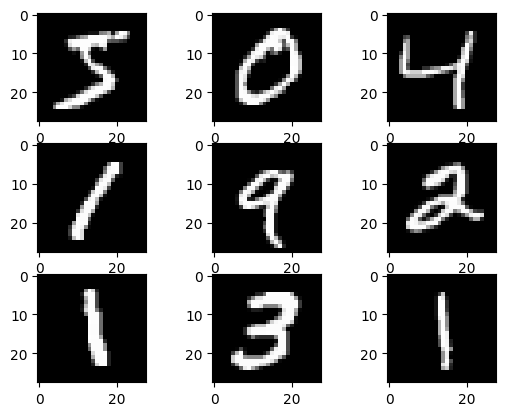

In [4]:
from matplotlib import pyplot
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# <p style="font-family:Cascadia Mono SemiBold;font-size:150%;text-align:center;color:#ff4d4d;">Reshapes Images for NN</p>

In [5]:
img_rows, img_cols=28, 28
if k.image_data_format() == 'channels_first': 
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
   inpx = (1, img_rows, img_cols) 
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
   inpx = (img_rows, img_cols, 1)

# <p style="font-family:Cascadia Mono SemiBold;font-size:150%;text-align:center;color:#ff4d4d;">Normalization</p>

In [6]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255

# <p style="font-family:Cascadia Mono SemiBold;font-size:150%;text-align:center;color:#ff4d4d;">Converting labels in y_train and y_test to one-hot encoded format</p>

In [7]:
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test)

# <p style="font-family:Cascadia Mono SemiBold;font-size:150%;text-align:center;color:#ff4d4d;">convolutional neural network (CNN)</p>

In [8]:
inpx = Input(shape=inpx) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
layer4 = Dropout(0.5)(layer3)
 
layer5 = Flatten()(layer4) 
layer6 = Dense(250, activation='sigmoid')(layer5) 
layer7 = Dense(10, activation='softmax')(layer6) 

# <p style="font-family:Cascadia Mono SemiBold;font-size:150%;text-align:center;color:#ff4d4d;">Training neural network model</p>

In [9]:
model = Model([inpx], layer7) 
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=150, batch_size=500)

Epoch 1/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 77s 631ms/step - accuracy: 0.1029 - loss: 2.4872
Epoch 2/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 632ms/step - accuracy: 0.1057 - loss: 2.4687
Epoch 3/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 75s 622ms/step - accuracy: 0.1036 - loss: 2.4547
Epoch 4/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 632ms/step - accuracy: 0.1047 - loss: 2.4391
Epoch 5/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 630ms/step - accuracy: 0.1028 - loss: 2.4243
Epoch 6/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 635ms/step - accuracy: 0.1031 - loss: 2.4115
Epoch 7/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 634ms/step - accuracy: 0.1025 - loss: 2.3943
Epoch 8/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 77s 636ms/step - accuracy: 0.1044 - loss: 2.3816
Epoch 9/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 636ms/step - accuracy: 0.1053 - loss: 2.3675
Epoch 10/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 79s 662ms/step - accuracy: 0.1034 - loss: 2.3580
Epoch 11/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 75s 626ms/step - accuracy: 0.1052 - loss: 2.3433
Epoch 12

# <p style="font-family:Cascadia Mono SemiBold;font-size:150%;text-align:center;color:#ff4d4d;">Evaluation on TEST DATA</p>

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=',score[0])
print('accuracy=', score[1])

loss= 0.44389423727989197
accuracy= 0.875


# <p style="font-family:Cascadia Mono SemiBold;font-size:150%;text-align:center;color:#ff4d4d;">Prediction</p>

In [11]:
#sinle Value predication in number
predictions = model.predict(x_test)
print(np.argmax(np.round(predictions[9])))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
9


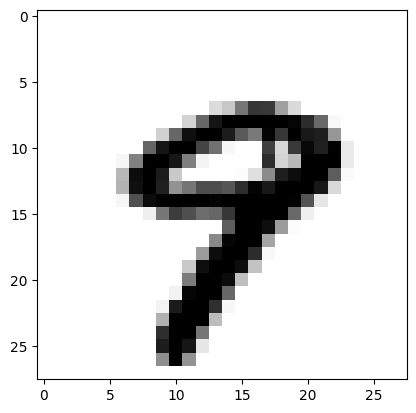

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_test[9].reshape(28, 28), cmap = plt.cm.binary)
plt.show()